# Economic Analysis with Pandas

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

# Loading environment variables
import os
from dotenv import load_dotenv
load_dotenv()
fred_api_key = os.environ.get('FRED_API_KEY')

# Initial settings
plt.style.use('fivethirtyeight')      # Default plotting style
pd.set_option('display.max_columns', 500)     

color_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']     # Pulls all colors from plot style

In [2]:
fred = Fred(api_key=fred_api_key)     # establish reusable fred object

### Sample Search Data (S&P)

In [3]:
fred.search('S&P')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2023-08-07,2023-08-07,S&P 500,2013-08-05,2023-08-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-04 19:10:52-05:00,81,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2023-08-07,2023-08-07,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2023-08-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-07 08:36:08-05:00,52,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2023-08-07,2023-08-07,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,29,This series is no longer being updated by the ...
CSUSHPINSA,CSUSHPINSA,2023-08-07,2023-08-07,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2023-08-07,2023-08-07,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-07-25 08:11:03-05:00,79,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CKSPPPMKA666NRUG,CKSPPPMKA666NRUG,2023-08-07,2023-08-07,Capital stock at Current Purchasing Power Pari...,1990-01-01,2019-01-01,Annual,A,Millions of 2017 U.S. Dollars,Mil. of 2017 U.S. $,Not Seasonally Adjusted,NSA,2023-02-27 14:33:36-06:00,3,Source ID: ck When using these data in your r...
CRDQHKBPABIS,CRDQHKBPABIS,2023-08-07,2023-08-07,Credit to Private Non-Financial Sector by Dome...,1978-10-01,2022-10-01,"Quarterly, End of Quarter",Q,Billions of Hong Kong Dollars,Bil. of Hong Kong $,Not Seasonally Adjusted,NSA,2023-06-12 13:03:08-05:00,3,"Credit is provided by domestic banks, all othe..."
CSHRCPCNA156NRUG,CSHRCPCNA156NRUG,2023-08-07,2023-08-07,Share of Residual Trade and GDP Statistical Di...,1952-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:35:26-06:00,3,Source ID: csh_r When using these data in you...


In [4]:
snp_search = fred.search('S&P', order_by='popularity')
snp_search.head()     # first 5 in descending order

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-08-07,2023-08-07,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-08-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-07 08:45:11-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-08-07,2023-08-07,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-08-07,2023-08-07,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-08-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-07 08:45:15-05:00,82,This data represents the effective yield of th...
SP500,SP500,2023-08-07,2023-08-07,S&P 500,2013-08-05,2023-08-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-04 19:10:52-05:00,81,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-08-07,2023-08-07,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


## Pulling Raw Data and Plot

<Axes: title={'center': 'S&P 500'}>

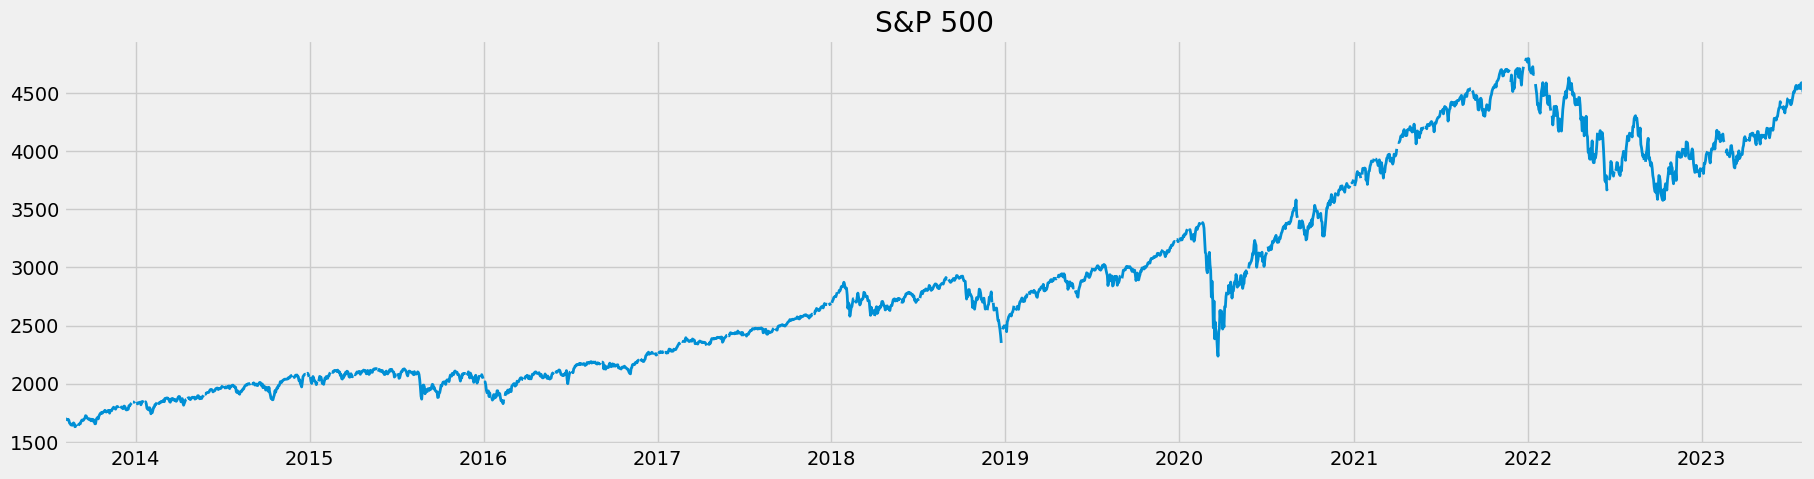

In [13]:
sp500 = fred.get_series(series_id = 'SP500')
sp500.plot(figsize=(20,5), title='S&P 500', lw=2)

<Axes: title={'center': 'NASDAQ Composite'}>

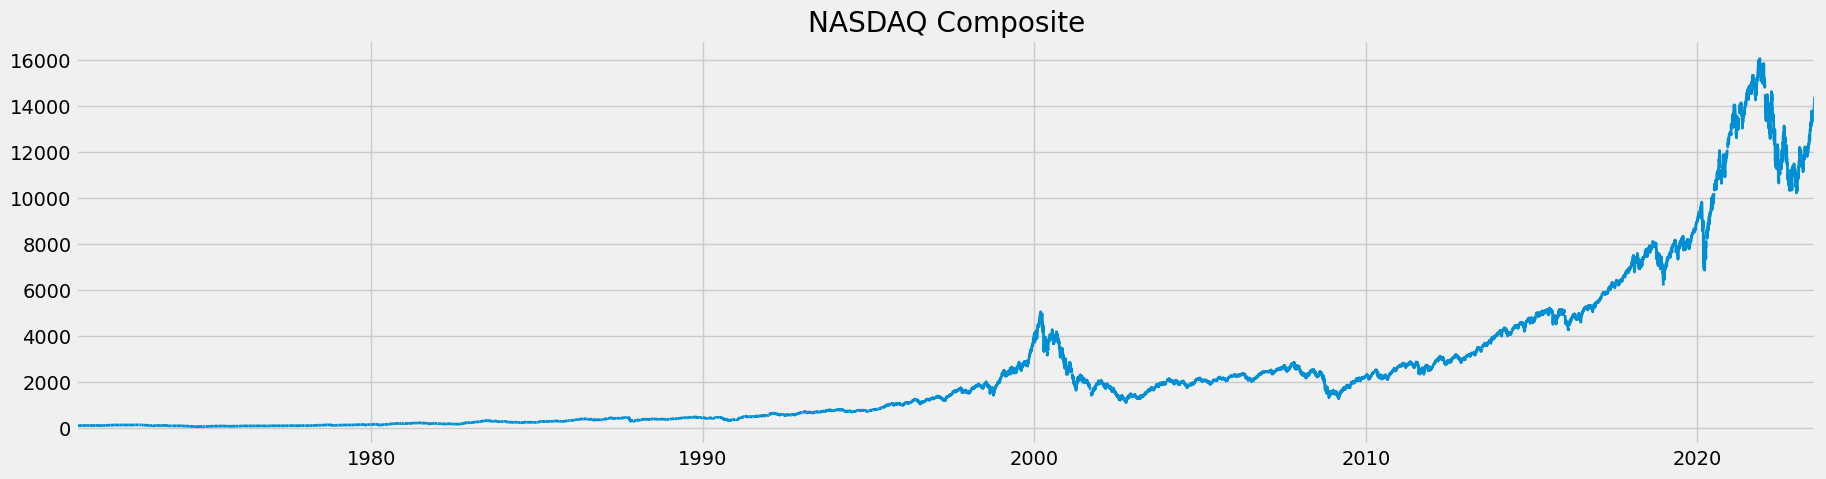

In [15]:
nasdaq = fred.get_series(series_id = 'NASDAQCOM')
nasdaq.plot(figsize=(20,5), title='NASDAQ Composite', lw=2)

<Axes: title={'center': 'Dow Jones Industrial Average'}>

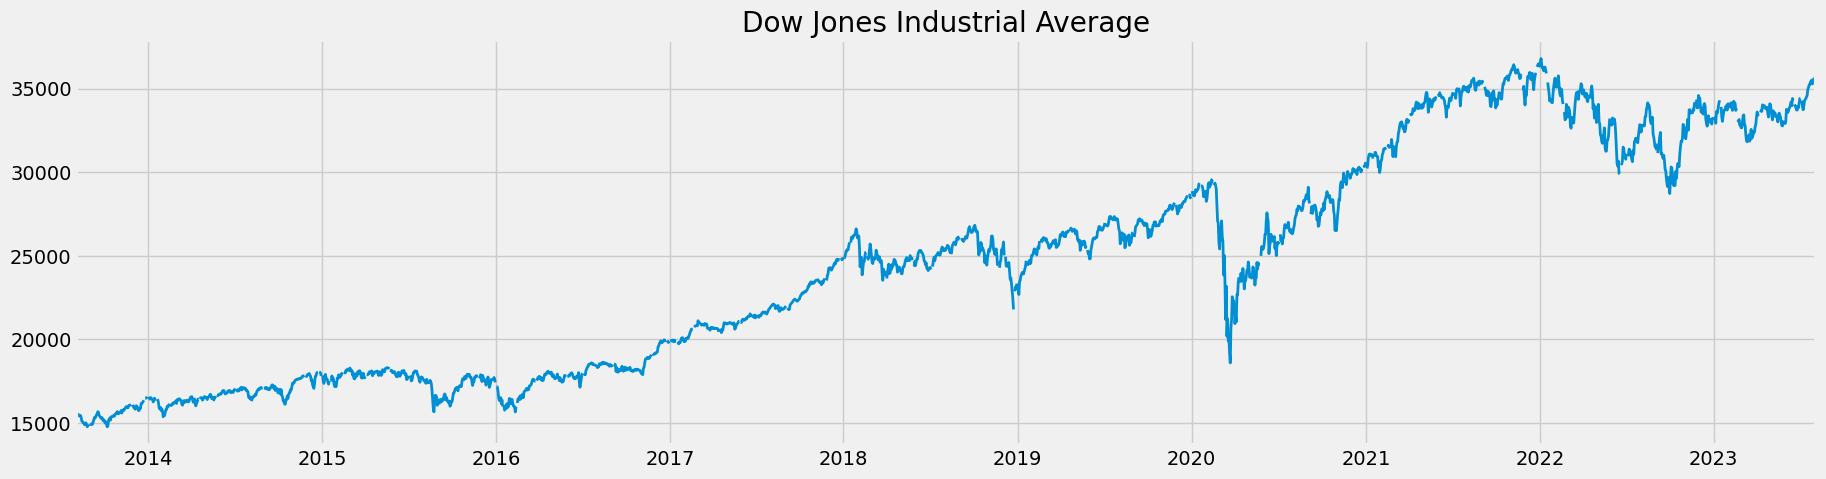

In [14]:
djia = fred.get_series(series_id = 'DJIA')
djia.plot(figsize=(20,5), title='Dow Jones Industrial Average', lw=2)